# Exploring data to engineer features

In this notebook, we will aim to explore different qualities of our recorded data. 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import numpy as np
import os
import re

In [4]:
#convert all information into MB so it is more understandable
mb=1000000

In [5]:
nf_vpn_a=pd.read_csv("data/mhrowlan_netflix_1x_vpn_mac_clean_20201101a.csv")
nf_vpn=pd.read_csv("data/mhrowlan_netflix_1x_vpn_mac_clean_20201101.csv")
yt_vpn_1080_2x_a=pd.read_csv("data/mhrowlan_youtube_1080p_2x_vpn_mac_clean_20201101a.csv")
yt_vpn_240_2x=pd.read_csv("data/mhrowlan_youtube_240p_2x_vpn_mac_clean_20201101.csv")

In [6]:
nostream_a=pd.read_csv("data/mhrowlan_nostream_novpn_mac_20201101a.csv")
nostream_b=pd.read_csv("data/mhrowlan_nostream_novpn_mac_20201101b.csv")
nostream_c=pd.read_csv("data/mhrowlan_nostream_novpn_mac_20201101c.csv")

In [7]:
nf_no_vpn= pd.read_csv("data/jeq004_netflix_1x_novpn_mac_clean_20201018.csv")
yt_no_vpn=pd.read_csv("data/jeq004-youtube-240p-1x-novpn-mac-clean-20201022.csv")

Overall, we can see that the max rate among the VPN streaming data has a much higher download rate than the non vpn non streaming data, this distinction should be helpful for making a classifer. Also, compared to the no vpn data, the VPN data has a large increase in bytes.

In [8]:
print(nostream_a["2->1Bytes"].max()/mb, "MB")
print(nostream_b["2->1Bytes"].max()/mb, "MB")
print(nostream_c["2->1Bytes"].max()/mb, "MB")
print(np.mean([0.155242,0.96355,0.193178]), "MB")


0.155242 MB
0.96355 MB
0.193178 MB
0.43732333333333334 MB


In [9]:
print(nf_vpn_a["2->1Bytes"].max()/(mb), "MB")
print(nf_vpn["2->1Bytes"].max()/(mb), "MB")
print(yt_vpn_1080_2x_a["2->1Bytes"].max()/(mb), "MB")
print(yt_vpn_240_2x["2->1Bytes"].max()/(mb), "MB")
x=np.average([1556369,2698360,2856017,3893021])
print(x/(mb), "MB")

1.556369 MB
2.69836 MB
2.856017 MB
3.893021 MB
2.75094175 MB


In [10]:
print(nf_no_vpn["2->1Bytes"].max()/mb, "MB")
print(yt_no_vpn["2->1Bytes"].max()/mb, "MB")

0.012738 MB
0.012738 MB


For the netflix data we can see a that the pattern of bytes being downloaded is pretty regular, but they vary in max byte sizes. 

Text(0.5, 1.0, 'Download Rates of Netflix on a VPN')

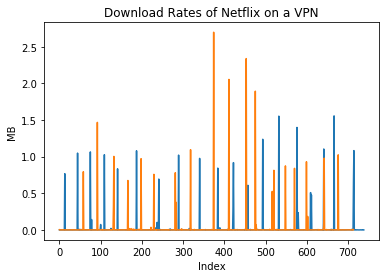

In [11]:
plt.plot(nf_vpn_a['2->1Bytes']/mb)
plt.plot(nf_vpn['2->1Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Download Rates of Netflix on a VPN")

In this graph we can see that overall, the lower quality Youtube videos generally has a lower download rate than the 1080p videos, but the intial spike to load the data is considerably higher

Text(0.5, 1.0, 'Download Rates of Varying Youtube Stream Qualities')

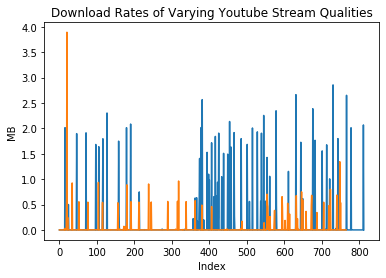

In [12]:
plt.plot(yt_vpn_1080_2x_a['2->1Bytes']/mb)
plt.plot(yt_vpn_240_2x['2->1Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Download Rates of Varying Youtube Stream Qualities")

In [13]:
nf_vpn_a

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
0,1604293449,192.168.0.104,5353,224.0.0.251,5353,17,872,0,6,0,1604293449461;1604293449462;1604293449462;1604...,68;105;254;172;67;206;,1;1;1;1;1;1;
1,1604293450,192.168.0.178,54619,137.110.0.70,443,17,2564,1858,4,3,1604293450075;1604293450075;1604293450075;1604...,1366;839;241;118;1366;374;118;,1;1;1;2;2;2;1;
2,1604293450,192.168.0.1,60794,255.255.255.255,7437,17,201,0,1,0,1604293450079;,201;,1;
3,1604293450,192.168.0.1,48659,224.0.0.251,5353,17,72,0,1,0,1604293450894;,72;,1;
4,1604293450,192.168.0.1,40220,224.0.0.251,5353,17,72,0,1,0,1604293450895;,72;,1;
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,1604293756,192.168.0.178,54619,137.110.0.70,443,17,3380,2104,10,9,1604293756239;1604293756239;1604293756240;1604...,391;177;1366;579;138;138;177;138;138;524;138;3...,1;1;1;1;2;2;2;1;2;2;1;2;1;2;2;1;1;1;2;
735,1604293759,192.168.0.1,60794,255.255.255.255,7437,17,201,0,1,0,1604293759121;,201;,1;
736,1604293759,192.168.0.178,54619,137.110.0.70,443,17,7675,3332,19,18,1604293759229;1604293759229;1604293759229;1604...,293;292;167;167;138;138;138;138;172;171;1362;1...,2;2;2;2;1;1;1;1;1;1;1;1;1;2;1;1;1;2;2;2;1;2;2;...
737,1604293759,192.168.0.143,5353,224.0.0.251,5353,17,140,0,1,0,1604293759939;,140;,1;


In [14]:
test=nf_vpn_a.groupby("Time")["2->1Bytes"].agg(["count", "mean"])
test.head()

,count,mean
Time,,
1604293449,1,0.0
1604293450,4,464.5
1604293451,2,235.0
1604293452,1,52.0
1604293453,2,0.0


Text(0.5, 1.0, 'Aggreate Download Byte Rates for Times')

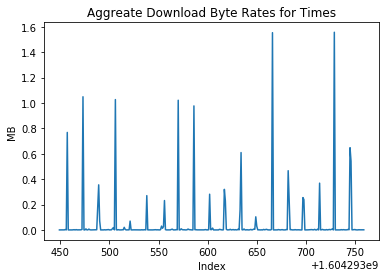

In [15]:
plt.plot(test["mean"]/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Aggreate Download Byte Rates for Times")

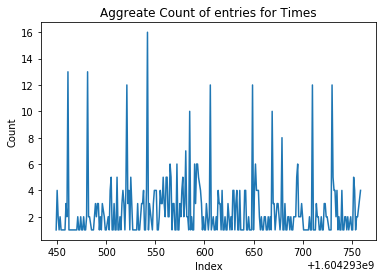

In [16]:
plt.xlabel("Index")
plt.ylabel("Count")
plt.title("Aggreate Count of entries for Times")
plt.plot(test["count"])


In [17]:
test[test["count"]==16]

,count,mean
Time,,
1604293542,16,65.8125


In [18]:
(nf_vpn_a[nf_vpn_a["Time"]==1604293542])

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
197,1604293542,192.168.0.178,54619,137.110.0.70,443,17,658,912,5,5,1604293542042;1604293542042;1604293542043;1604...,191;138;183;138;106;118;210;210;138;138;,2;1;2;1;1;2;2;2;1;1;
198,1604293542,192.168.0.1,55937,224.0.0.251,5353,17,72,0,1,0,1604293542073;,72;,1;
199,1604293542,192.168.0.1,37731,224.0.0.251,5353,17,72,0,1,0,1604293542075;,72;,1;
200,1604293542,192.168.0.1,58631,224.0.0.251,5353,17,72,0,1,0,1604293542075;,72;,1;
201,1604293542,192.168.0.1,59961,224.0.0.251,5353,17,72,0,1,0,1604293542075;,72;,1;
202,1604293542,192.168.0.178,54433,137.110.0.70,443,6,141,141,2,2,1604293542149;1604293542167;1604293542167;1604...,89;52;89;52;,1;2;2;1;
203,1604293542,192.168.0.1,45008,224.0.0.251,5353,17,72,0,1,0,1604293542175;,72;,1;
204,1604293542,192.168.0.1,36410,224.0.0.251,5353,17,72,0,1,0,1604293542175;,72;,1;
205,1604293542,192.168.0.1,41236,192.168.0.255,20002,17,333,0,1,0,1604293542176;,333;,1;
206,1604293542,192.168.0.1,43635,224.0.0.251,5353,17,72,0,1,0,1604293542176;,72;,1;


In [20]:
nf_vpn_a[nf_vpn_a["Time"]==1604293759]

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
735,1604293759,192.168.0.1,60794,255.255.255.255,7437,17,201,0,1,0,1604293759121;,201;,1;
736,1604293759,192.168.0.178,54619,137.110.0.70,443,17,7675,3332,19,18,1604293759229;1604293759229;1604293759229;1604...,293;292;167;167;138;138;138;138;172;171;1362;1...,2;2;2;2;1;1;1;1;1;1;1;1;1;2;1;1;1;2;2;2;1;2;2;...
737,1604293759,192.168.0.143,5353,224.0.0.251,5353,17,140,0,1,0,1604293759939;,140;,1;
738,1604293759,FE80::1C32:6413:9B06:83CF,5353,FF02::FB,5353,17,160,0,1,0,1604293759939;,160;,1;


In [21]:
test2=nf_vpn_a.groupby("Time")["2->1Pkts"].agg(["count", "mean"])
test2.head()

,count,mean
Time,,
1604293449,1,0.00
1604293450,4,0.75
1604293451,2,1.50
1604293452,1,1.00
1604293453,2,0.00


In [22]:
test2=nf_no_vpn.groupby("Time")["2->1Bytes"].agg(["count", "mean"])
test2.head()

,count,mean
Time,,
1603073263,4,13.000000
1603073264,2,0.000000
1603073265,3,10.666667
1603073266,7,50.285714
1603073267,5,53.600000


The magnitude of vpn downloads vs no vpn is much higher

Text(0.5, 1.0, 'Netflix VPN vs no VPN Download Rates')

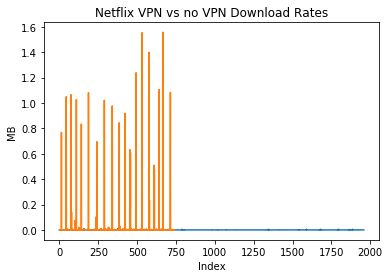

In [23]:
plt.plot(nf_no_vpn['2->1Bytes']/mb)
plt.plot(nf_vpn_a['2->1Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Netflix VPN vs no VPN Download Rates")

# In terms of features, I think 2->1 Bytes is a very helpful indicator for classifying VPN vs non VPN

Text(0.5, 1.0, 'Netflix VPN vs no VPN Upload Rates')

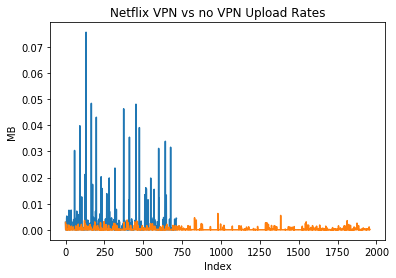

In [24]:
plt.plot(nf_vpn['1->2Bytes']/mb)
plt.plot(nf_no_vpn['1->2Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Netflix VPN vs no VPN Upload Rates")

Text(0.5, 1.0, 'Youtube VPN vs no VPN Upload Rates')

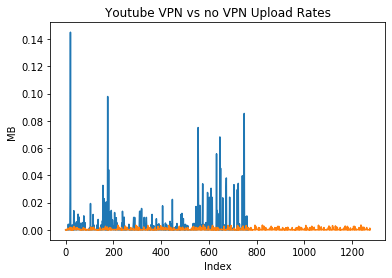

In [25]:
plt.plot(yt_vpn_240_2x['1->2Bytes']/mb)
plt.plot(yt_no_vpn['1->2Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Youtube VPN vs no VPN Upload Rates")

## From these charts we can also see that 1->2 byte rates also have great differences for VPN and no VPN which would make it a good feature for classification

The packet data is very similar to the byte data, just in different scales, so I don't think using both is necessary for the model

Text(0.5, 1.0, 'Netflix VPN vs no VPN Download Rates')

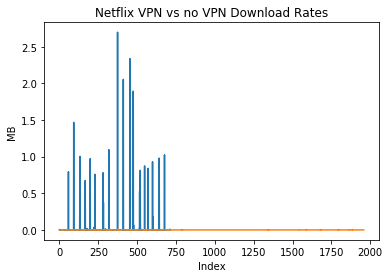

In [26]:
plt.plot(nf_vpn['2->1Bytes']/mb)
plt.plot(nf_no_vpn['2->1Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Netflix VPN vs no VPN Download Rates")

Text(0.5, 1.0, 'Netflix VPN vs no VPN Download Rates')

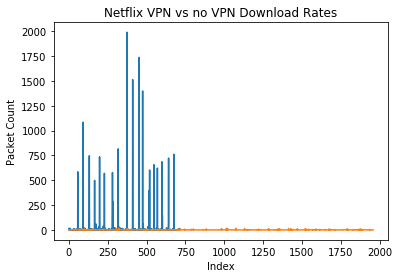

In [27]:
plt.plot(nf_vpn['2->1Pkts'])
plt.plot(nf_no_vpn['2->1Pkts'])
plt.xlabel("Index")
plt.ylabel("Packet Count")
plt.title("Netflix VPN vs no VPN Download Rates")

Overall, I think the byte rates are the best tool for classifying the data. I don't feel like using a VPN the ISP should be checking IP address or port address as I feel like that is an ethical concern. The packet data is very similar to the byte data. The extended data is rather hard to process and seemingly not increasing a whole lot of understanding to the data. While it shows the order in which the packets are being received and their size, it is easily summarized in the other byte data. 

## Cleaning the file strings

In order to extract the meaningful data from the file string, we need to clean the data.

In [28]:
files=pd.Series(["mhrowlan_netflix_1x_vpn_mac_clean_20201101a.csv",
"mhrowlan_netflix_1x_vpn_mac_clean_20201101.csv","mhrowlan_youtube_1080p_2x_vpn_mac_clean_20201101a.csv",
"mhrowlan_youtube_240p_2x_vpn_mac_clean_20201101.csv"])

In [29]:
files

0      mhrowlan_netflix_1x_vpn_mac_clean_20201101a.csv
1       mhrowlan_netflix_1x_vpn_mac_clean_20201101.csv
2    mhrowlan_youtube_1080p_2x_vpn_mac_clean_202011...
3    mhrowlan_youtube_240p_2x_vpn_mac_clean_2020110...
dtype: object

In [30]:
files=files.str.replace(".csv","")

In [31]:
files=files.str.split("_")#,expand=True)

In [32]:
files

0    [mhrowlan, netflix, 1x, vpn, mac, clean, 20201...
1    [mhrowlan, netflix, 1x, vpn, mac, clean, 20201...
2    [mhrowlan, youtube, 1080p, 2x, vpn, mac, clean...
3    [mhrowlan, youtube, 240p, 2x, vpn, mac, clean,...
dtype: object

Here we drop the name column for privacy purposes.  

In [33]:
files.drop(columns=0)

0    [mhrowlan, netflix, 1x, vpn, mac, clean, 20201...
1    [mhrowlan, netflix, 1x, vpn, mac, clean, 20201...
2    [mhrowlan, youtube, 1080p, 2x, vpn, mac, clean...
3    [mhrowlan, youtube, 240p, 2x, vpn, mac, clean,...
dtype: object

During week 6, our domain had everyone make EDAs and share them with each other. This code is heavily based on code from tiq004@ucsd.edu to seperate and clean the data into a table. The main modification I am making to this code, is to remove the letter characters from the date, when multiple recordings of a similar type were made on the same day and covert them to datetime, to modify the video/no video protocol to recognize no videos and be boolean, change the VPN to a boolean value, and covert the numeric values into numbers. 

In [34]:
## import re
def cal_labels(entries):
    new_str = []
    for i in entries:
        temp=i.replace('[','')
        temp=temp.replace(']','')
        temp=temp.replace(' ','')
        temp=temp.replace('_','-')
        temp=temp.replace('.csv','')
        temp=temp.replace('nonvpn','novpn')
        for num in range(10):
            temp=temp.replace('('+str(num)+')','')
        str_list=temp.split('-')
        new_str.append(str_list)
    labels = {'video','streaming_provider','quality','playback_speed','vpn','platform','clean','date'}

    big_list = set(list(np.concatenate(new_str).flat))

    #username = [i[0] for i in new_str]
    video = []
    streaming_provider = []
    quality = []
    playback_speed = []
    vpn = []
    platform = []
    clean = []
    dates = [i[-1] for i in new_str]

    for i in new_str:
        if "novpn" in i:
            vpn.append(False)
        else:
            vpn.append(True)

        if "youtube" in i:
            streaming_provider.append("youtube")
        elif "hulu" in i:
            streaming_provider.append("hulu")
        elif "amazon" in i:
            streaming_provider.append("amazonprime")
        elif "netflix" in i:
            streaming_provider.append("netflix")
        elif "bilibili" in i:
            streaming_provider.append("bilibili")
        else:
            streaming_provider.append("other")

        if "clean" in i:
            clean.append(True)
        elif "noisy" in i:
            clean.append(False)
        elif "dirty" in i:
            clean.append(False)
        else:
            clean.append(np.nan)

        counter = 0
        for j in i:
            #print (i)
            if counter == len(i)-1:
                quality.append(np.nan)
                break
            if "1080" in j:
                quality.append("1080")
                break
            elif "2160" in j:
                quality.append("2160")
                break
            elif "240" in j:
                quality.append("240")
                break
            elif "480" in j:
                quality.append("480")
                break
            elif "144" in j:
                quality.append("144")
                break
            elif "320" in j:
                quality.append("320")
                break
            elif "720" in j:
                quality.append("720")
                break
            counter = counter + 1

        if "windows" in i:
            platform.append("windows")
        elif "mac" in i:
            platform.append("mac")
        elif "linux" in i:
            platform.append("linux")
        else:
            platform.append("other")

        if ("1x" or "1") in i:
            playback_speed.append(1)
        elif ("2x" or "2" or "2.0x") in i:
            playback_speed.append(2)
        elif ("1.5x" or "1.5x" or "1.5x") in i:
            playback_speed.append(1.5)
        elif ("1.4x" or "1.4"or "1.40x") in i:
            playback_speed.append(1.4)
        elif ("0.5x" or "0.5") in i:
            playback_speed.append(0.5)
        elif ("0.25x" or "0.25") in i:
            playback_speed.append(0.25)
        elif ("1.25x" or "1.25") in i:
            playback_speed.append(1.25)
        elif ("1.75x" or "1.75") in i:
            playback_speed.append(1.75)
        else:
            playback_speed.append(np.nan)
            
        if ("nostream") in i:
            video.append(False)
        else:
            video.append(True)
        
    for date in dates:
        date=re.sub('[^0-9]','',date)
        date= pd.to_datetime(date)

    labels = {'video':video,'streaming_provider':streaming_provider,'quality':quality,'playback_speed':playback_speed,'vpn':vpn,'platform':platform,'clean':clean,'date':date}
    return labels
    
    

In [36]:
raw_path = "data/"
entries = os.listdir(raw_path)
entries.sort()
entries=entries[:-11]
df2 = pd.DataFrame.from_dict(cal_labels(entries))
df2

,video,streaming_provider,quality,playback_speed,vpn,platform,clean,date
0,True,other,1080,1.0,True,mac,True,2020-11-01
1,True,youtube,1080,1.0,False,mac,True,2020-11-01
2,True,youtube,240,1.0,False,mac,True,2020-11-01
3,True,youtube,720,1.0,False,mac,True,2020-11-01
4,True,netflix,NaN,1.0,False,mac,True,2020-11-01
5,True,youtube,NaN,1.0,True,mac,True,2020-11-01
6,True,other,NaN,NaN,False,mac,NaN,2020-11-01
7,True,netflix,NaN,1.0,True,mac,True,2020-11-01
8,True,netflix,NaN,1.0,True,mac,True,2020-11-01
9,False,other,NaN,NaN,False,mac,NaN,2020-11-01
